<h1 style="color: #2c3f51"> Paddy Doctor: Paddy Disease Classification </h1>

Learn to use modern deep-learning networks to build an **image classifier** with Keras.

### Problem Statement
Rice (Oryza sativa) is one of the staple foods worldwide. Paddy, the raw grain before removal of husk, is cultivated in tropical climates, mainly in Asian countries. Paddy cultivation requires consistent supervision because several diseases and pests might affect the paddy crops, leading to up to 70% yield loss. Expert supervision is usually necessary to mitigate these diseases and prevent crop loss. With the limited availability of crop protection experts, manual disease diagnosis is tedious and expensive. Thus, it is increasingly important to automate the disease identification process by leveraging computer vision-based techniques that achieved promising results in various domains.

### Objective
The main objective of this competition is to develop a machine or deep learning-based model to classify the given paddy leaf images accurately. We provide a training dataset of 10,407 (75%) labeled images across ten classes (nine disease categories and normal leaf). Moreover, we also provide additional metadata for each image, such as the paddy variety and age. Your task is to classify each paddy image in the given test dataset of 3,469 (25%) images into one of the nine disease categories or a normal leaf.

Source : [competition website](https://www.kaggle.com/competitions/paddy-disease-classification/overview/description)

<center>
    <h2 style="color: #2c3f51"> 🏃🏻 Let's identify the type of disease present in paddy leaf images </h2>

### Imports

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import tensorflow as tf
from tensorflow import keras

import matplotlib.pyplot as plt

import os, warnings

# Config

In [2]:
batch_size = 16
img_dim = 128
RESCALE = 1.0/255

VALIDATION_SPLIT = 0.1
SEED = 42

warnings.filterwarnings("ignore") # to clean up output cells

# Load Data

In [3]:
train_dir = '../input/paddy-disease-classification/train_images/'

In [4]:
img_datagen = keras.preprocessing.image.ImageDataGenerator(
    rescale=RESCALE,
    validation_split=VALIDATION_SPLIT,
    rotation_range=5,
    shear_range=0.3,
    zoom_range=0.3,
    width_shift_range=0.05,
    height_shift_range=0.05,
    horizontal_flip=True,
    vertical_flip=True,
)

In [5]:
ds_train = img_datagen.flow_from_directory(
    train_dir,
    subset="training",
    seed=SEED,
    target_size=(img_dim, img_dim),
    batch_size=batch_size,
    class_mode="categorical",
)

Found 9371 images belonging to 10 classes.


In [6]:
ds_valid = img_datagen.flow_from_directory(
    train_dir,
    subset="validation",
    seed=SEED,
    target_size=(img_dim, img_dim),
    batch_size=batch_size,
    class_mode="categorical",
)

Found 1036 images belonging to 10 classes.


In [7]:
print(ds_train.class_indices)
OUTPUT_SIZE = len(ds_train.class_indices)

print("\n We have", OUTPUT_SIZE, " differents class")

{'bacterial_leaf_blight': 0, 'bacterial_leaf_streak': 1, 'bacterial_panicle_blight': 2, 'blast': 3, 'brown_spot': 4, 'dead_heart': 5, 'downy_mildew': 6, 'hispa': 7, 'normal': 8, 'tungro': 9}

 We have 10  differents class


# Modeling (with keras)

Now, we are going to build our model. Let's use :

- The **Conv2D** : to create a convolution kernel that is convolved with the layer input to produce a tensor of outputs. [more](https://keras.io/api/layers/convolution_layers/convolution2d/)

- The **MaxPooling2D** : downsamples the input along its spatial dimensions (height and width). [more](https://keras.io/api/layers/pooling_layers/max_pooling2d/)

- The **Flatten** layer : to transform the two dimensional outputs of the base into the one dimensional inputs needed by the head. [more](https://www.kaggle.com/code/ryanholbrook/the-convolutional-classifier)

In [8]:
from tensorflow.keras import layers

model = keras.Sequential([
    layers.InputLayer(input_shape=(img_dim, img_dim, 3)),
    layers.Conv2D(16, (3,3), activation='selu' ),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(32, (3,3), activation='selu'),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(64, (3,3), activation='selu'),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(128, (3,3), activation='selu'),
    layers.MaxPooling2D(2,2),
    layers.Flatten(),
    layers.Dense(2048, activation='selu'),
    layers.Dense(1024, activation='selu'),
    layers.Dense(256, activation='selu'),
    layers.Dense(128, activation='selu'),
    layers.Dense(OUTPUT_SIZE, activation='softmax')
])

model.summary()

2022-05-24 11:56:03.515790: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-05-24 11:56:03.654187: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-05-24 11:56:03.654962: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 126, 126, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 63, 63, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 61, 61, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 30, 30, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 12, 12, 128)       7

2022-05-24 11:56:03.656595: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-05-24 11:56:03.656870: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-05-24 11:56:03.657513: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-05-24 11:56:03.658203: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA 

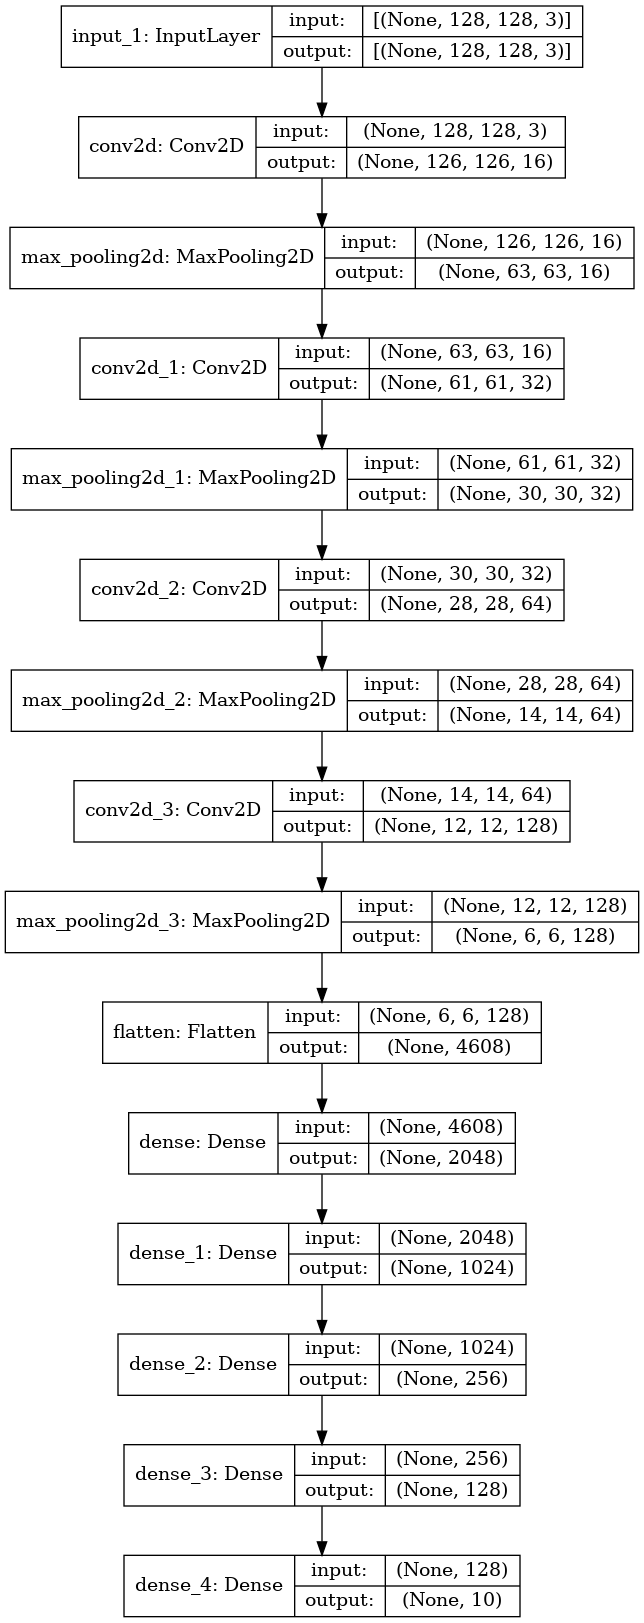

In [9]:
keras.utils.plot_model(model, to_file='model.png', expand_nested=True, show_shapes=True)

### Callbacks

Let's define the callbacks : EarlyStopping & ReduceLROnPlateau.

- The **EarlyStopping** : stop training when a monitored metric has stopped improving. [more](https://keras.io/api/callbacks/early_stopping/)

- The **ReduceLROnPlateau** : reduce learning rate when a metric has stopped improving. [more](https://keras.io/api/callbacks/reduce_lr_on_plateau/)


In [10]:
early_stopping_callback = keras.callbacks.EarlyStopping(monitor='val_loss',
                            min_delta=0,
                            patience=5,
                            verbose=0, 
                            mode='auto')

lr_reducer = keras.callbacks.ReduceLROnPlateau(monitor='val_loss', 
                            factor=0.7,
                            patience=5)

callbacks = [early_stopping_callback, lr_reducer]

### Training
Finally, let's train the model. Since this is a ten class problem, we'll use the *Categorical* versions of crossentropy and accuracy. The adam optimizer generally performs well, so we'll choose it as well.

We are going to try to use GPU.

In [11]:
EPOCHS = 150

with tf.device(tf.test.gpu_device_name()):
    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=135e-6), # Optimizer
        # Loss function to minimize
        loss=keras.losses.CategoricalCrossentropy(),
        # List of metrics to monitor
        metrics=[keras.metrics.Accuracy()]
    )
    
    history = model.fit(
        ds_train,
        epochs=EPOCHS,
        validation_data = ds_valid,
        callbacks=callbacks,
        verbose=1,
    )

2022-05-24 11:56:07.557299: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-05-24 11:56:07.557917: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-05-24 11:56:07.558239: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-05-24 11:56:07.558604: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-05-24 11:56:07.558960: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from S

Epoch 1/150


2022-05-24 11:56:09.589448: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


586/586 [==============================] - 176s 287ms/step - loss: 1.9402 - accuracy: 0.0000e+00 - val_loss: 1.7743 - val_accuracy: 0.0000e+00
Epoch 2/150
586/586 [==============================] - 95s 163ms/step - loss: 1.6653 - accuracy: 0.0000e+00 - val_loss: 1.4936 - val_accuracy: 0.0000e+00
Epoch 3/150
586/586 [==============================] - 97s 165ms/step - loss: 1.4885 - accuracy: 0.0000e+00 - val_loss: 1.4047 - val_accuracy: 0.0000e+00
Epoch 4/150
586/586 [==============================] - 99s 168ms/step - loss: 1.3476 - accuracy: 0.0000e+00 - val_loss: 1.2806 - val_accuracy: 0.0000e+00
Epoch 5/150
586/586 [==============================] - 105s 178ms/step - loss: 1.2620 - accuracy: 0.0000e+00 - val_loss: 1.2099 - val_accuracy: 0.0000e+00
Epoch 6/150
586/586 [==============================] - 107s 182ms/step - loss: 1.1395 - accuracy: 0.0000e+00 - val_loss: 1.1560 - val_accuracy: 0.0000e+00
Epoch 7/150
586/586 [==============================] - 104s 178ms/step - loss: 1.0586

Now, we are going to examine the loss and metric plots.

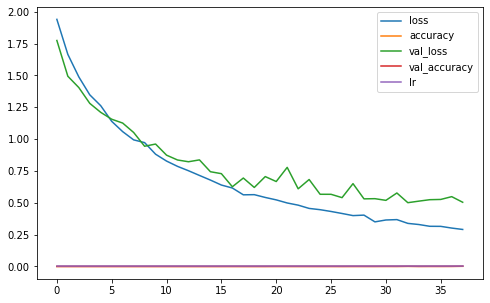

In [12]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.show()

# Test Predictions

In [13]:
# Load test Data
test_path = '../input/paddy-disease-classification/test_images'
ds_test = keras.preprocessing.image.ImageDataGenerator(rescale=RESCALE).flow_from_directory(    
    directory=test_path,
    target_size=(img_dim, img_dim),
    batch_size=batch_size,
    classes=['.'],
    shuffle=False,
)

Found 3469 images belonging to 1 classes.


In [14]:
# Prediction 
predict = model.predict(ds_test, verbose=1)

217/217 [==============================] - 41s 190ms/step


In [15]:
predicted_class_indices = np.argmax(predict,axis=1)
print(set(predicted_class_indices))

inv_map = {v:k for k,v in ds_train.class_indices.items()}

predictions = [inv_map[k] for k in predicted_class_indices]

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}


# Submission

In [16]:
filenames = ds_test.filenames

submission = pd.DataFrame({ "image_id":filenames, "label":predictions })

submission.image_id = submission.image_id.str.replace('./', '')
submission.to_csv("submission.csv",index=False)
submission.head()

,image_id,label
0,200001.jpg,hispa
1,200002.jpg,hispa
2,200003.jpg,blast
3,200004.jpg,blast
4,200005.jpg,blast


In [17]:
submission['label'].value_counts()

blast                       855
normal                      592
dead_heart                  523
hispa                       457
brown_spot                  285
tungro                      254
bacterial_leaf_blight       163
bacterial_leaf_streak       144
downy_mildew                126
bacterial_panicle_blight     70
Name: label, dtype: int64

# Acknowledgements

We acknowledge the [Paddy Doctor](https://paddydoc.github.io/) project team at the Department of Computer Science and Engineering, Manonmaniam Sundaranar University, Tirunelveli, India, and its collaborators.

# Ressources 


- Kaggle course on [computer vision](https://www.kaggle.com/learn/computer-vision)
- keras [documentation](https://keras.io/)
- @maifeeulasad [work](https://www.kaggle.com/code/maifeeulasad/paddy-doctor-paddy-disease-classification)



<h5 style="color: #cc3100"> If you find this notebook useful, support with an upvote👍

<center>
    <h2 style="color: #cc3100"> Thanks for reading 🤗 </h2>


<center>
    <h2 style